### Problem 2: Numerical Brownian motion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# function calculating MSD
def calculate_msd(X, t):
    msd = np.mean(X**2, axis=1)-np.mean(X, axis=1)
    
    return msd
    

In [3]:
# function solving the Langevin equation and plotting
def JustNoise(ax,nruns,sigma,times):
    X = np.empty([times.size,nruns])
    for runs in range(nruns):
        x = np.vstack(np.random.randn(1)) # initial condition
        for t in range(len(times)-1):
            xnew = x[-1] + sigma*np.random.normal(loc=0.0,scale=np.sqrt(dt))
            x = np.append(x, xnew)
        
        ax.plot(times, x, alpha=1/np.log(nruns+1),linewidth = 2)

        ax.set_xlabel('Time',fontsize = 14)
        ax.set_ylabel('Position x',fontsize = 14)

        X[:,runs] = x
    return X

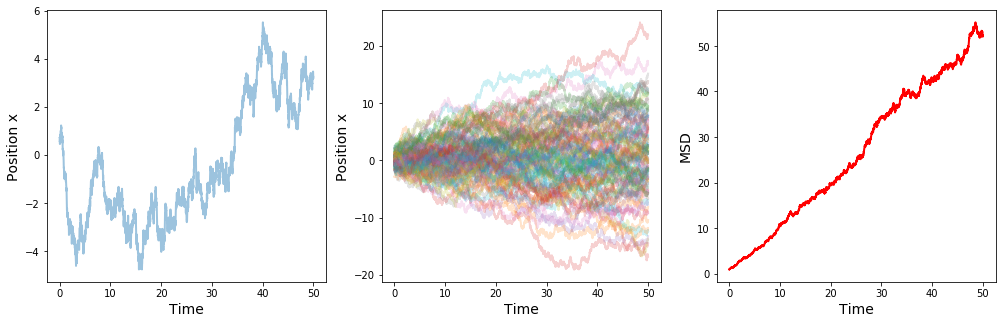

In [5]:
# Play with these parameters!
total_time = 50 #Total time of trajectories
N = 100 # Number of trajectories
dt = 0.01 # time discretization
sigma = 1 #noise strength
times = np.arange(0,total_time,dt)

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(17,5))

Y = JustNoise(ax1,1, sigma, times)
X = JustNoise(ax2,N, sigma, times)

#Call function to calculate MSD:
msd = calculate_msd(X, times)


ax3.plot(times, msd ,'r', linewidth=2)
ax3.set_xlabel('Time',fontsize = 14)
ax3.set_ylabel('MSD',fontsize = 14)
plt.savefig("sheet7_Prob1.pdf")